In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [2]:
data = pd.read_csv("insurance.csv")

<IPython.core.display.Javascript object>

In [3]:
data.shape

(1338, 7)

<IPython.core.display.Javascript object>

In [4]:
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
842,23,female,32.78,2,yes,southeast,36021.0112
1126,55,male,29.90,0,no,southwest,10214.6360
293,22,female,28.82,0,no,southeast,2156.7518
237,31,male,38.39,2,no,southeast,4463.2051
1103,58,male,36.08,0,no,southeast,11363.2832


<IPython.core.display.Javascript object>

In [5]:
ins = data.copy()

<IPython.core.display.Javascript object>

In [6]:
ins.duplicated().sum()

1

<IPython.core.display.Javascript object>

## Question 1

In [7]:
# What is the shape of the data and how many values are missing in the charges column?

df = pd.read_csv("insurance.csv")

df.shape

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<IPython.core.display.Javascript object>

In [9]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<IPython.core.display.Javascript object>

In [10]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<IPython.core.display.Javascript object>

## Question 2

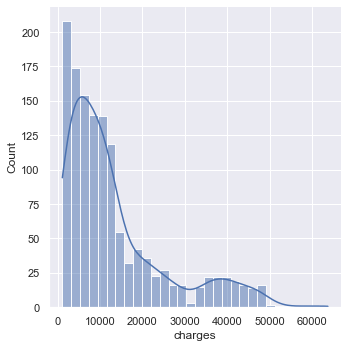

<IPython.core.display.Javascript object>

In [11]:
# What does the distribution of charges look like?
sns.displot(data=df, x="charges", kde=True)

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=ins, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=ins, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=ins, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

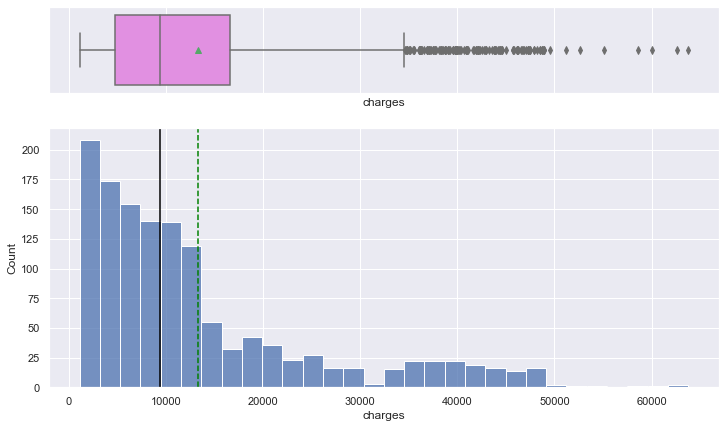

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(ins, "charges")

## Question 3

In [14]:
# What percentage of policy holders have no children?
df.children.value_counts(normalize=True) * 100

0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64

<IPython.core.display.Javascript object>

In [15]:
# creating a list of tag columns
tag_cols = [item for item in ins.columns if "children" in item]

# printing the number of occurrences of each unique value in each categorical column
for column in tag_cols:
    print(ins[column].value_counts())
    print("-" * 50)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

In [16]:
ins.children.sum()

1465

<IPython.core.display.Javascript object>

## Question 4

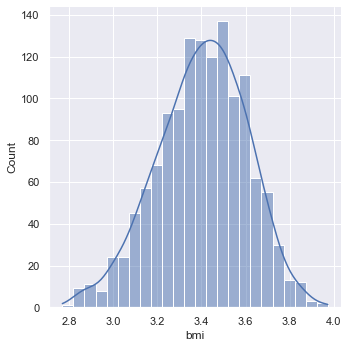

<IPython.core.display.Javascript object>

In [17]:
# What does the distribution of bmi look like after applying the log transformation on it?
sns.displot(np.log(df.bmi), kde=True)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<IPython.core.display.Javascript object>

In [19]:
ins["bmiT"] = ins["bmi"]

<IPython.core.display.Javascript object>

In [20]:
ins.sample()

,age,sex,bmi,children,smoker,region,charges,bmiT
492,18,female,25.08,0,no,northeast,2196.4732,25.08


<IPython.core.display.Javascript object>

In [21]:
cols_to_log = ["children", "bmiT"]
for colname in cols_to_log:
    ins[colname + "_log"] = np.log(ins[colname] + 1)

<IPython.core.display.Javascript object>

In [22]:
ins.sample(10)

,age,sex,bmi,children,smoker,region,charges,bmiT,children_log,bmiT_log
1074,60,female,18.335,0,no,northeast,13204.28565,18.335,0.000000,2.961917
430,19,male,33.100,0,no,southwest,23082.95533,33.100,0.000000,3.529297
1270,26,male,33.915,1,no,northwest,3292.52985,33.915,0.693147,3.552917
325,40,male,34.105,1,no,northeast,6600.20595,34.105,0.693147,3.558344
698,56,male,33.725,0,no,northwest,10976.24575,33.725,0.000000,3.547460
900,49,male,22.515,0,no,northeast,8688.85885,22.515,0.000000,3.157639
827,36,male,28.025,1,yes,northeast,20773.62775,28.025,0.693147,3.368158
170,63,male,41.470,0,no,southeast,13405.39030,41.470,0.000000,3.748798
942,18,female,40.185,0,no,northeast,2217.46915,40.185,0.000000,3.718074
918,61,female,28.200,0,no,southwest,13041.92100,28.200,0.000000,3.374169


<IPython.core.display.Javascript object>

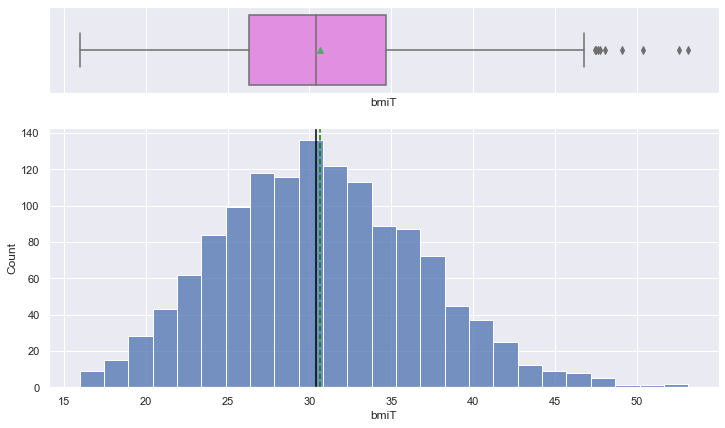

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(ins, "bmiT")

## Question 5

In [24]:
# The customers from which region have the highest median insurance charge?
df.groupby("region").charges.median()

region
northeast    10057.652025
northwest     8965.795750
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64

<IPython.core.display.Javascript object>

In [25]:
ins.head()

,age,sex,bmi,children,smoker,region,charges,bmiT,children_log,bmiT_log
0,19,female,27.900,0,yes,southwest,16884.92400,27.900,0.000000,3.363842
1,18,male,33.770,1,no,southeast,1725.55230,33.770,0.693147,3.548755
2,28,male,33.000,3,no,southeast,4449.46200,33.000,1.386294,3.526361
3,33,male,22.705,0,no,northwest,21984.47061,22.705,0.000000,3.165686
4,32,male,28.880,0,no,northwest,3866.85520,28.880,0.000000,3.397189


<IPython.core.display.Javascript object>

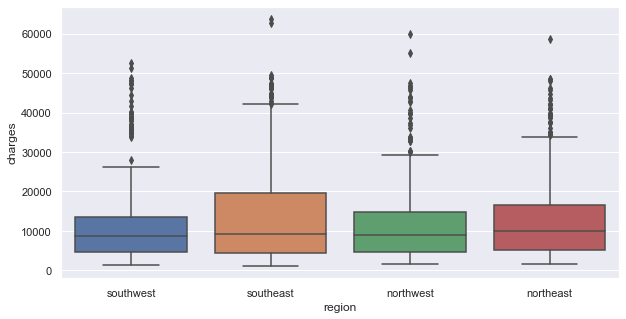

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="region", y="charges", data=ins)
plt.show()

## Question 6

<AxesSubplot:>

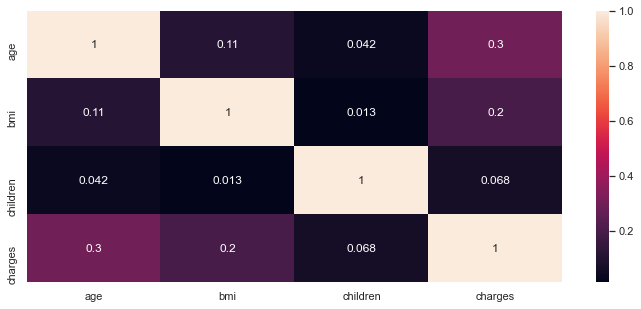

<IPython.core.display.Javascript object>

In [27]:
# What is the correlation between age and charges?

plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True)

In [28]:
# What is the correlation between age and charges? A different way
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<IPython.core.display.Javascript object>

In [29]:
corr_cols = [item for item in data.columns if "tag" not in item]
print(corr_cols)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


<IPython.core.display.Javascript object>

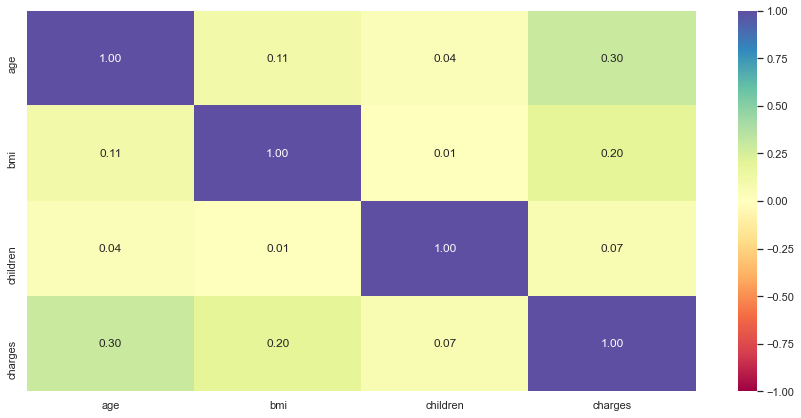

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    ins[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [31]:
## Question 7

<IPython.core.display.Javascript object>

In [32]:
# Create dummy variables for the categorical columns using pd.get_dummies() with drop_first=True.
# A dummy variable is dropped for which of the following regions?   NOTE: the north east column was dropped
df = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<IPython.core.display.Javascript object>

In [33]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
 7   bmiT          1338 non-null   float64
 8   children_log  1338 non-null   float64
 9   bmiT_log      1338 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 104.7+ KB


<IPython.core.display.Javascript object>

In [34]:
ins.head()

,age,sex,bmi,children,smoker,region,charges,bmiT,children_log,bmiT_log
0,19,female,27.900,0,yes,southwest,16884.92400,27.900,0.000000,3.363842
1,18,male,33.770,1,no,southeast,1725.55230,33.770,0.693147,3.548755
2,28,male,33.000,3,no,southeast,4449.46200,33.000,1.386294,3.526361
3,33,male,22.705,0,no,northwest,21984.47061,22.705,0.000000,3.165686
4,32,male,28.880,0,no,northwest,3866.85520,28.880,0.000000,3.397189


<IPython.core.display.Javascript object>

## Question 8

In [1]:
# Split the data in 70:30 ratio to obtain the train and test sets, and build a linear regression model
# using sklearn LinearRegression and the train set. Which of the following is true for the coefficient of age?
X = df.drop(["charges"], axis=1)
y = df["charges"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

lr = LinearRegression()
lr.fit(x_train, y_train)

coef_df = pd.DataFrame(
    np.append(lr.coef_, lr.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

NameError: name 'df' is not defined

In [36]:
# x = ins.drop(["charges"], axis=1,)
# y = ins["charges"]

<IPython.core.display.Javascript object>

In [37]:
# x.head()

<IPython.core.display.Javascript object>

In [38]:
# x.shape

<IPython.core.display.Javascript object>

In [39]:
# x = pd.get_dummies(
#    x,
#    columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
#    drop_first=True,
# )
# x.head()

<IPython.core.display.Javascript object>

In [40]:
# x.describe()

<IPython.core.display.Javascript object>

In [41]:
# i fucked up and deleted this

<IPython.core.display.Javascript object>

In [42]:
# lin_reg_model = LinearRegression()
# lin_reg_model.fit(x_train1, y_train1)

<IPython.core.display.Javascript object>

In [43]:
# coef_df = pd.DataFrame(
#    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
#    index=x_train.columns.tolist() + ["Intercept"],
#    columns=["Coefficients"],
# )
# coef_df

<IPython.core.display.Javascript object>

## Question 9

In [44]:
# What percentage of variance in the train set is explained by the model?
lr.score(x_train, y_train)  # this is what the class said but it no work

0.7545557492633161

<IPython.core.display.Javascript object>

## Question 10

In [48]:
# Which of the following is true for the MAE and RMSE on the test set?

y_pred = lr.predict(x_test)

np.sqrt(mean_squared_error(y_test, y_pred))

mean_absolute_error(y_test, y_pred)

4139.932064766009

<IPython.core.display.Javascript object>